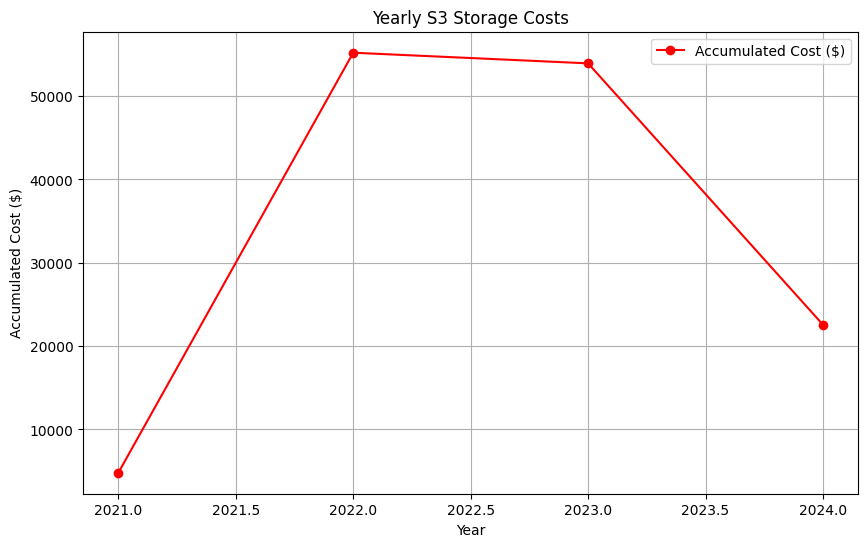

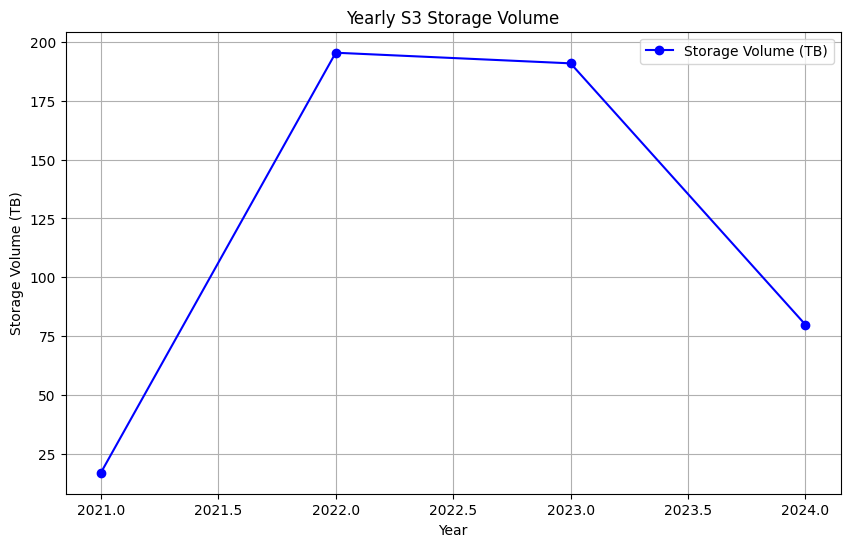

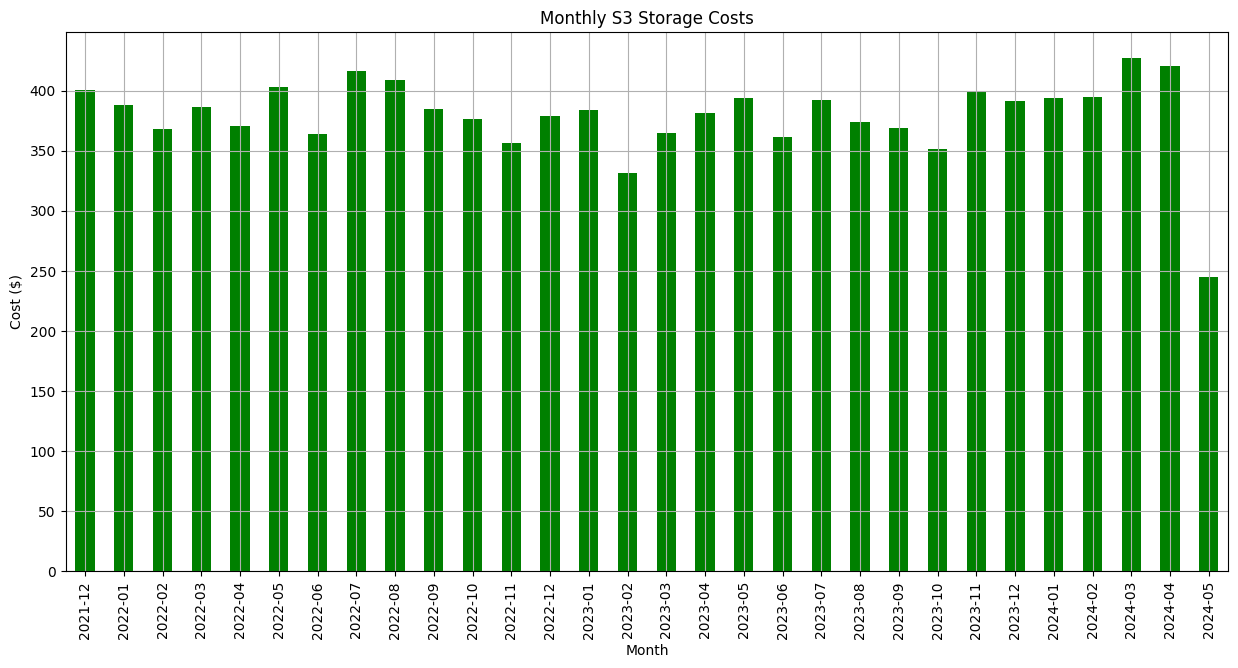

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Parameters
num_rows = 10000
start_date = "2021-12-01"
end_date = datetime.now().strftime('%Y-%m-%d')
cost_per_gb_per_month = 0.023  # Example cost of S3 storage per GB per month

# Generate simulated data
np.random.seed(42)
file_paths = [f"file_{i}.txt" for i in range(num_rows)]
file_sizes = np.random.uniform(0.1, 100, num_rows)  # File sizes between 0.1 GB and 100 GB
file_timestamps = pd.to_datetime(np.random.choice(pd.date_range(start=start_date, end=end_date), num_rows))

# Create DataFrame
data = pd.DataFrame({
    "file_path": file_paths,
    "file_size": file_sizes,
    "file_timestamp": file_timestamps
})

# Save to CSV
data.to_csv("s3_inventory.csv", index=False)

# Read data
df = pd.read_csv("s3_inventory.csv")
df['file_timestamp'] = pd.to_datetime(df['file_timestamp'])

# Calculate accumulated cost year-over-year
df['year'] = df['file_timestamp'].dt.year
df['month'] = df['file_timestamp'].dt.to_period('M')

yearly_costs = df.groupby('year')['file_size'].sum() * cost_per_gb_per_month * 12
monthly_costs = df.groupby('month')['file_size'].sum() * cost_per_gb_per_month

# Calculate total storage volume per year in TB
yearly_storage_tb = df.groupby('year')['file_size'].sum() / 1024

# Plotting yearly costs
plt.figure(figsize=(10, 6))
plt.plot(yearly_costs.index, yearly_costs.values, marker='o', linestyle='-', color='r', label='Accumulated Cost ($)')
plt.xlabel('Year')
plt.ylabel('Accumulated Cost ($)')
plt.title('Yearly S3 Storage Costs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting yearly storage volume
plt.figure(figsize=(10, 6))
plt.plot(yearly_storage_tb.index, yearly_storage_tb.values, marker='o', linestyle='-', color='b', label='Storage Volume (TB)')
plt.xlabel('Year')
plt.ylabel('Storage Volume (TB)')
plt.title('Yearly S3 Storage Volume')
plt.legend()
plt.grid(True)
plt.show()

# Plot monthly costs
plt.figure(figsize=(15, 7))
monthly_costs.plot(kind='bar', color='g', title='Monthly S3 Storage Costs')
plt.ylabel('Cost ($)')
plt.xlabel('Month')
plt.grid(True)
plt.show()
